# Proyecto final Analítica de Datos
## Estudiante : Priscila Kwiatkowski
## Tecnicatura: Innovación con tecnologías
### Cohorte : 2022

# Extracción de Datos (Extract):

## 1. Cargar los datos de ventas y clientes desde el archivo CSV en dos DataFrames distintos.

##### Primero se procese a importar las librerias de utilidad para este proyecto, luego se cargan los datos de los archivos CSV de ventas y clientes en los que a continuación aparece como df_clientes y df_ventas

In [1]:
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import sklearn as skl

In [5]:
import seaborn as sns

In [6]:
df_clientes = pd.read_csv("customer_data.csv")

In [7]:
df_ventas = pd.read_csv("sales_data.csv")

## 2. Describir el proceso de extracción y cómo se acceden a los datos en los DataFrames
##### Se extrajeron los datos mediantes los archivos CSV como se menciona más arriba y con la función pd.read_csv. Cada uno de ellos fue almacenado en dos dataFrame llamados df_clientes y df_ventas 

##### Accedo a una vista general de los datos llamando a cada dataFrame --

In [8]:
df_clientes

,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash
...,...,...,...,...
99452,C441542,Female,45.0,Credit Card
99453,C569580,Male,27.0,Cash
99454,C103292,Male,63.0,Debit Card
99455,C800631,Male,56.0,Cash


In [9]:
df_ventas

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon
...,...,...,...,...,...,...,...
99452,I219422,C441542,Souvenir,5,58.65,21-09-2022,Kanyon
99453,I325143,C569580,Food & Beverage,2,10.46,22-09-2021,Forum Istanbul
99454,I824010,C103292,Food & Beverage,2,10.46,28-03-2021,Metrocity
99455,I702964,C800631,Technology,4,4200.00,16-03-2021,Istinye Park


##### Luego, a través del método *info* muestro un resumen de cada dataframe, incluyendo información sobre el tipo de los índices de filas y columnas, los valores no nulos y la memoria usada: esto me permite tener una mirada más específica de la estructura de los datos con los que estoy trabajando --

In [10]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB


In [11]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   price          99457 non-null  float64
 5   invoice_date   99457 non-null  object 
 6   shopping_mall  99457 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB


##### Por último una vista de la cantidad de filas y columnas de los dataFrame utilizando el atributo *shape* y concluimos esta primera parte en dónde observamos la estructura en dónde se encuentran los datos, además de la cantidad y el tipo de datos con los que vamos a trabajar --

In [12]:
df_ventas.shape

(99457, 7)

In [13]:
df_clientes.shape

(99457, 4)

## 3. Concatenar los dos Data Frames anteriores, en uno final con información relevante. No borrar los Dataframes de ventas y clientes 

##### Decido concatenar con el método *merge* mezclando todos los registros para posteriormente realizar una limpieza --

In [14]:
df_negocio = pd.merge(df_ventas,df_clientes, on='customer_id', how = 'outer') 

In [15]:
df_negocio

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon,Female,28.0,Credit Card
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul,Male,21.0,Debit Card
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,Male,20.0,Cash
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM,Female,66.0,Credit Card
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon,Female,53.0,Cash
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Souvenir,5,58.65,21-09-2022,Kanyon,Female,45.0,Credit Card
99453,I325143,C569580,Food & Beverage,2,10.46,22-09-2021,Forum Istanbul,Male,27.0,Cash
99454,I824010,C103292,Food & Beverage,2,10.46,28-03-2021,Metrocity,Male,63.0,Debit Card
99455,I702964,C800631,Technology,4,4200.00,16-03-2021,Istinye Park,Male,56.0,Cash


# Transformación de Datos (Transform): 
## Realizar operaciones de limpieza y preparación de datos en ambos DataFrames. Esto incluirá la gestión de valores nulos, la estandarización de formatos de fecha, y la unión de datos de ventas y clientes utilizando el campo común "id del cliente".

##### Utilizo este comando para buscar un cliente a partir de su customer_id, esto es solo para consultas de pruebas --

In [16]:
df_negocio.loc[df_negocio.customer_id =="C569580"]

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method
99453,I325143,C569580,Food & Beverage,2,10.46,22-09-2021,Forum Istanbul,Male,27.0,Cash


##### Utilizo describe para imprimir una vista general de las columnas y los valores --

In [17]:
print(df_negocio.describe)

<bound method NDFrame.describe of       invoice_no customer_id         category  quantity    price invoice_date  \
0        I138884     C241288         Clothing         5  1500.40   05-08-2022   
1        I317333     C111565            Shoes         3  1800.51   12-12-2021   
2        I127801     C266599         Clothing         1   300.08   09-11-2021   
3        I173702     C988172            Shoes         5  3000.85   16-05-2021   
4        I337046     C189076            Books         4    60.60   24-10-2021   
...          ...         ...              ...       ...      ...          ...   
99452    I219422     C441542         Souvenir         5    58.65   21-09-2022   
99453    I325143     C569580  Food & Beverage         2    10.46   22-09-2021   
99454    I824010     C103292  Food & Beverage         2    10.46   28-03-2021   
99455    I702964     C800631       Technology         4  4200.00   16-03-2021   
99456    I232867     C273973         Souvenir         3    35.19   15-10-20

## Manejo de datos faltantes 
##### Utilizo el método *info* para ver nuevamente los datos del nuevo dataframe *NEGOCIO* y puedo notar que en la columna *age* tengo 99338 registros en vez de 99457 --

In [18]:
df_negocio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   category        99457 non-null  object 
 3   quantity        99457 non-null  int64  
 4   price           99457 non-null  float64
 5   invoice_date    99457 non-null  object 
 6   shopping_mall   99457 non-null  object 
 7   gender          99457 non-null  object 
 8   age             99338 non-null  float64
 9   payment_method  99457 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 8.3+ MB


##### En este caso, al ser 119 registros los faltantes, en vez de eliminarlos, utilizaré la edad media para remplazar o rellenar esos espacios --

In [19]:
df_negocio.isnull().sum()

invoice_no          0
customer_id         0
category            0
quantity            0
price               0
invoice_date        0
shopping_mall       0
gender              0
age               119
payment_method      0
dtype: int64

##### a través de *describe* observo la edad media del dataframe negocio --

In [20]:
df_negocio.describe()

,quantity,price,age
count,99457.000000,99457.000000,99338.000000
mean,3.003429,689.256321,43.425859
std,1.413025,941.184567,14.989400
min,1.000000,5.230000,18.000000
25%,2.000000,45.450000,30.000000
50%,3.000000,203.300000,43.000000
75%,4.000000,1200.320000,56.000000
max,5.000000,5250.000000,69.000000


##### Utilizaré la edad media de 43 años para resolver este problema,con la función *replace*, ya que eliminar estos regístros significa perdida de datos valiosos, en este caso particular, también probé con *sklearn* con *SimpleImputer* pero al momento de utilizar *fit()* para el entrenamiento me daba constantemente error, y pese a buscar soluciones, no fue posible dar con la respuesta al error, decidí seguir con el tp con la solución más sencilla 

In [21]:
df_negocio["age"] = df_negocio["age"].replace(np.nan, 43) 

##### Compruebo el estado de esos registros que anteriormente se encontraban vacios --

In [22]:
df_negocio.isnull().sum()

invoice_no        0
customer_id       0
category          0
quantity          0
price             0
invoice_date      0
shopping_mall     0
gender            0
age               0
payment_method    0
dtype: int64

##### Chequeo nuevamente el tipo de dato --

In [23]:
df_negocio.dtypes

invoice_no         object
customer_id        object
category           object
quantity            int64
price             float64
invoice_date       object
shopping_mall      object
gender             object
age               float64
payment_method     object
dtype: object

##### Y cambio el dato de la columna *age* a enteros 

In [24]:
df_negocio['age'] = df_negocio['age'].astype('int64')

In [25]:
df_negocio["age"]

0        28
1        21
2        20
3        66
4        53
         ..
99452    45
99453    27
99454    63
99455    56
99456    36
Name: age, Length: 99457, dtype: int64

##### Conteo de los niveles en las diferentes columnas categóricas --

In [26]:
cols_cat = ["category", "shopping_mall", "gender", "payment_method"]

##### Realizo un conteo de los diferentes valores de los subniveles --

In [27]:
for col in cols_cat:
    print(f'columna {col}: {df_negocio[col].nunique()} subniveles')

columna category: 8 subniveles
columna shopping_mall: 10 subniveles
columna gender: 2 subniveles
columna payment_method: 3 subniveles


## Limpieza de filas repetidas 
##### Realizo una limpieza de posibles filas repetidas --

In [28]:
print(f'Tamañó del set antes de eliminar las filas repetidas: {df_negocio.shape}')
df_negocio.drop_duplicates(inplace = True)
print(f'Tamañó del set después de eliminar las filas repetidas: {df_negocio.shape}')

Tamañó del set antes de eliminar las filas repetidas: (99457, 10)
Tamañó del set después de eliminar las filas repetidas: (99457, 10)


##### Lo que confirma que no había filas repetidas 

## Errores tipográficos en variables categóricas
##### Reviso posibles errores tipográficos en las distintas variables de las columnas categóricas --

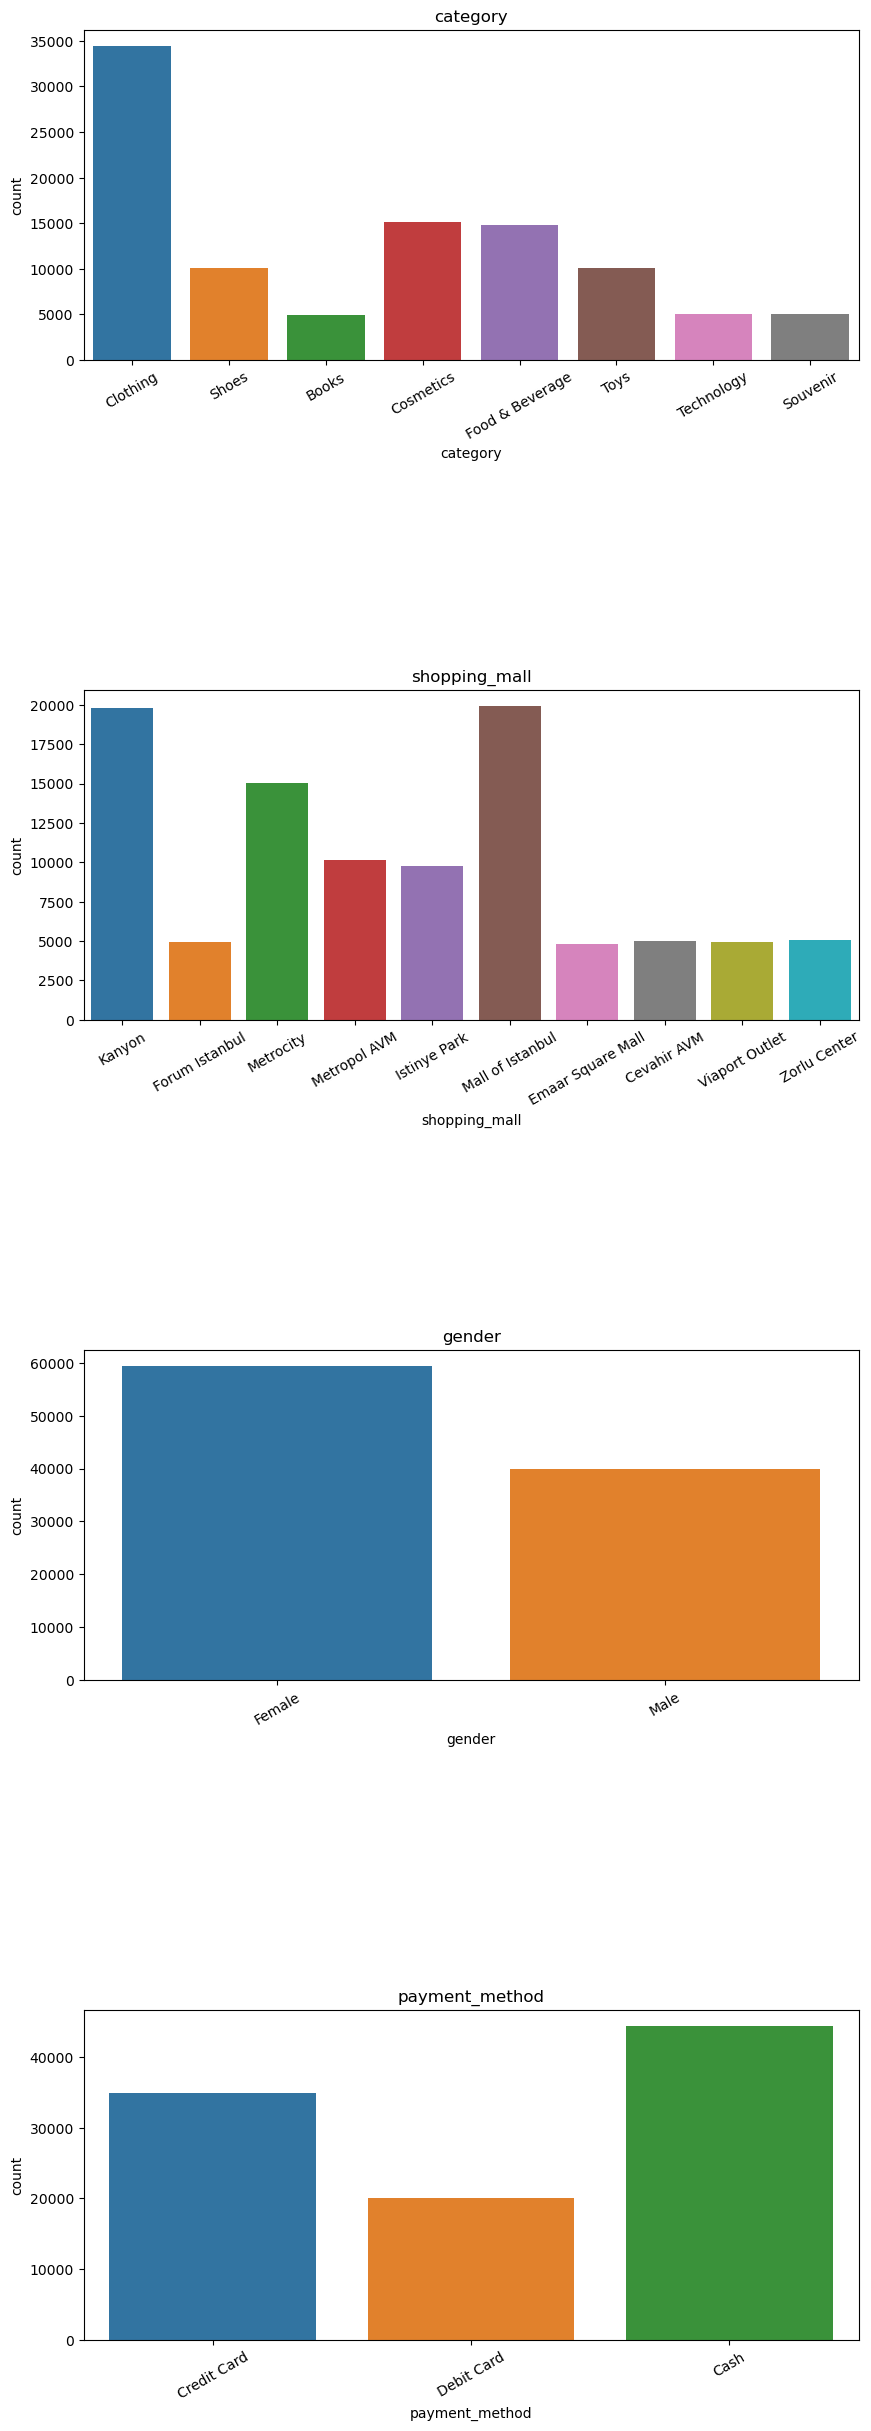

In [29]:
cols_cat = ["category", "shopping_mall", "gender", "payment_method"]
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data = df_negocio, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

## Outliers - Valores extremos -
##### Reviso si hay datos extremos en las columnas numéricas 

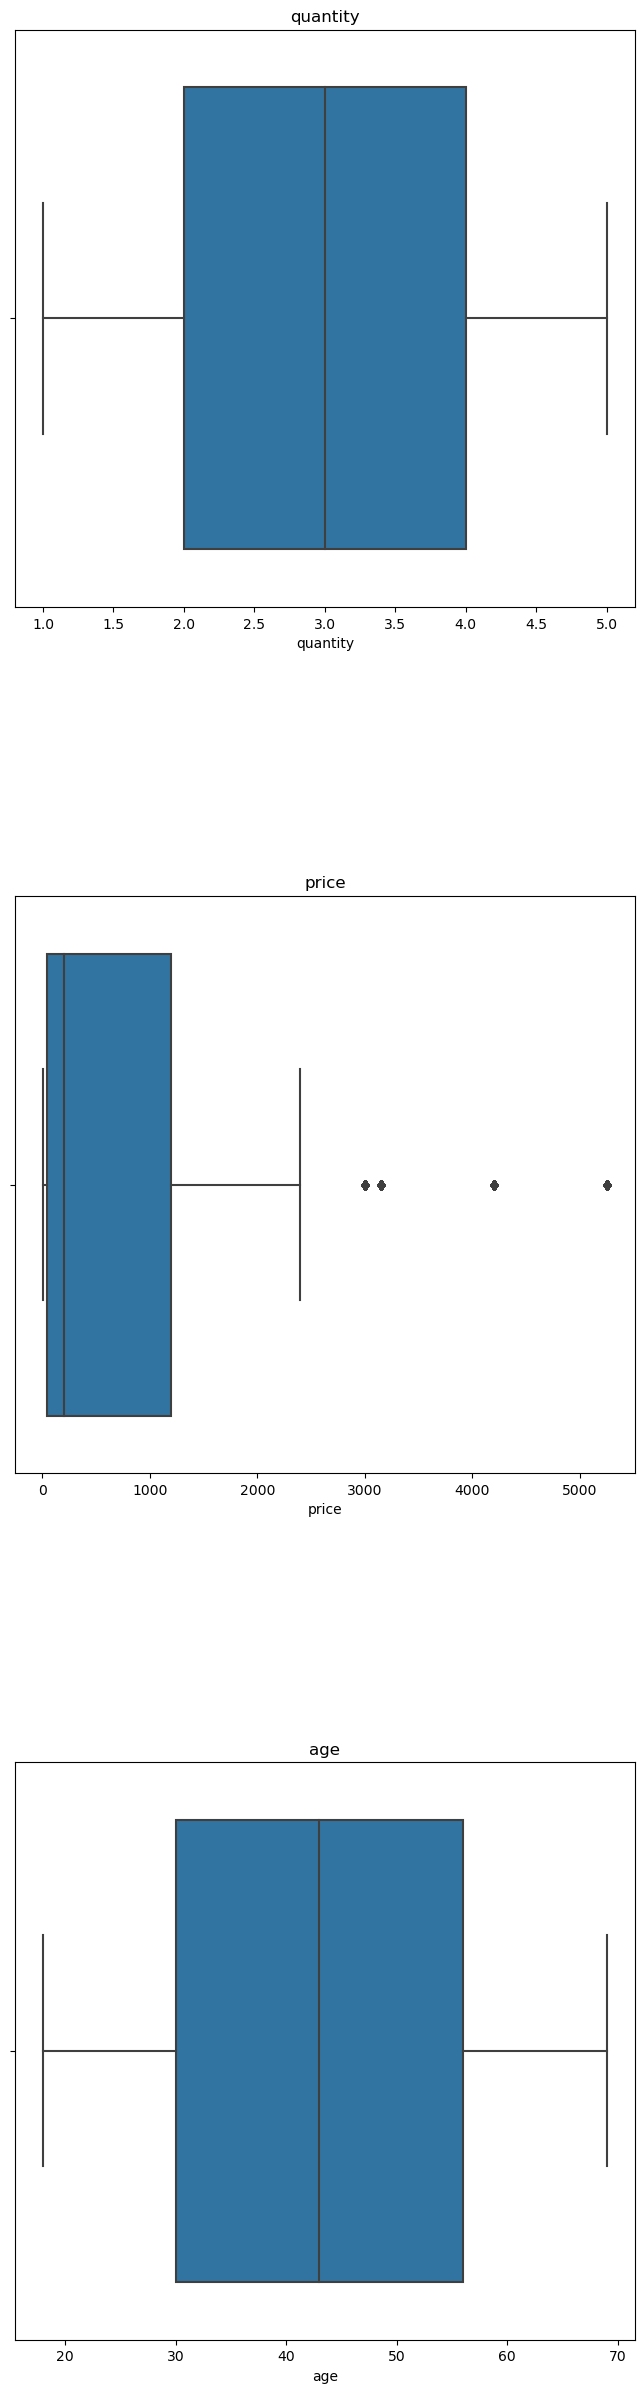

In [30]:
cols_num = ["quantity", "price", "age"]
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data = df_negocio, ax=ax[i])
    ax[i].set_title(col)

## Unificación del index por el Id del cliente

In [31]:
df_negocio = df_negocio.set_index('customer_id')

In [32]:
df_negocio

,invoice_no,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method
customer_id,,,,,,,,,
C241288,I138884,Clothing,5,1500.40,05-08-2022,Kanyon,Female,28,Credit Card
C111565,I317333,Shoes,3,1800.51,12-12-2021,Forum Istanbul,Male,21,Debit Card
C266599,I127801,Clothing,1,300.08,09-11-2021,Metrocity,Male,20,Cash
C988172,I173702,Shoes,5,3000.85,16-05-2021,Metropol AVM,Female,66,Credit Card
C189076,I337046,Books,4,60.60,24-10-2021,Kanyon,Female,53,Cash
...,...,...,...,...,...,...,...,...,...
C441542,I219422,Souvenir,5,58.65,21-09-2022,Kanyon,Female,45,Credit Card
C569580,I325143,Food & Beverage,2,10.46,22-09-2021,Forum Istanbul,Male,27,Cash
C103292,I824010,Food & Beverage,2,10.46,28-03-2021,Metrocity,Male,63,Debit Card


## Estandarización de la fecha en la columna *invoice_date*

In [33]:
df_negocio['invoice_date'] = pd.to_datetime(df_negocio['invoice_date'], dayfirst=True)

##### Chequeo el tipo de dato de la columna invoice_date, que era del tipo object y ahora pasa a ser datetime64[ns] 

In [34]:
df_negocio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99457 entries, C241288 to C273973
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   category        99457 non-null  object        
 2   quantity        99457 non-null  int64         
 3   price           99457 non-null  float64       
 4   invoice_date    99457 non-null  datetime64[ns]
 5   shopping_mall   99457 non-null  object        
 6   gender          99457 non-null  object        
 7   age             99457 non-null  int64         
 8   payment_method  99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 7.6+ MB


##### Llamo al dataFrame para observar los cambios a simple vista 

In [35]:
df_negocio

,invoice_no,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method
customer_id,,,,,,,,,
C241288,I138884,Clothing,5,1500.40,2022-08-05,Kanyon,Female,28,Credit Card
C111565,I317333,Shoes,3,1800.51,2021-12-12,Forum Istanbul,Male,21,Debit Card
C266599,I127801,Clothing,1,300.08,2021-11-09,Metrocity,Male,20,Cash
C988172,I173702,Shoes,5,3000.85,2021-05-16,Metropol AVM,Female,66,Credit Card
C189076,I337046,Books,4,60.60,2021-10-24,Kanyon,Female,53,Cash
...,...,...,...,...,...,...,...,...,...
C441542,I219422,Souvenir,5,58.65,2022-09-21,Kanyon,Female,45,Credit Card
C569580,I325143,Food & Beverage,2,10.46,2021-09-22,Forum Istanbul,Male,27,Cash
C103292,I824010,Food & Beverage,2,10.46,2021-03-28,Metrocity,Male,63,Debit Card


##### Decido guardar el dataFrame limpio en esta parte del TP ya que a partir de aquí haré consultas. De esta manera me aseguro de tener guardado los datos limpios del dataFrame NEGOCIO en un nuevo archivo

In [87]:
df_negocio.to_csv("negocio_resultado_final.csv")

## A partir de aquí trabajo con un dataFrame limpio y listo para realizar consultas, buscando datos importantes.

## 4. Realizar transformaciones adicionales como determinar el modo de pago más frecuente de todos los clientes y a su vez categorizados por género. 
### Realice una categorización de clientes de acuerdo a su forma de pago (por edad y género).
### Métodos de pagos realizados por el rango etario de 25 a 35 años
### Métodos de pago más utilizados por las mujeres.
### Precios por categoría de productos
## 5. Documentar las transformaciones realizadas en detalle y explicar su justificación.

##### Modo de pago más frecuentes de todos los clientes 

In [37]:
df_negocio['payment_method'].value_counts(dropna=False)

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

### Se muestra un gráfico para visualizar los métodos de pagos más utilizados por los clientes

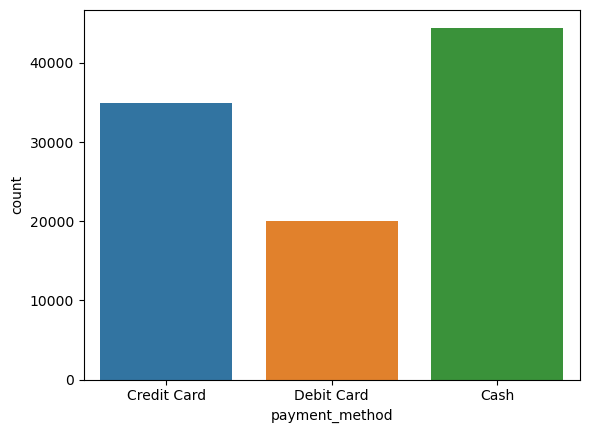

In [38]:
sns.countplot(x='payment_method', data = df_negocio)
plt.show()

##### Podemos observar el método de pago por genero 

In [39]:
pago_genero = df_negocio.groupby(['payment_method'])['gender'].value_counts()
pago_genero

payment_method  gender
Cash            Female    26509
                Male      17938
Credit Card     Female    21011
                Male      13920
Debit Card      Female    11962
                Male       8117
Name: gender, dtype: int64

##### Realizo un gráfico de la categorización de método de pago por genero 

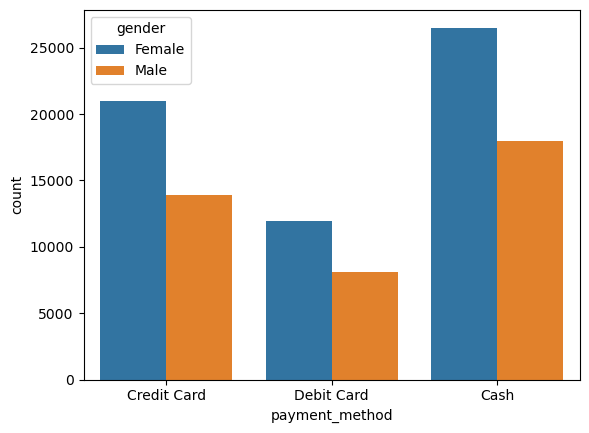

In [40]:
sns.countplot(x='payment_method', hue='gender', data = df_negocio)
plt.show()

##### Observando estos datos entiendo que hay más clientes mujeres que hombres, voy a chequear esa información con la cantidad exacta --

In [41]:
df_negocio.gender.value_counts()

Female    59482
Male      39975
Name: gender, dtype: int64

##### Realizo una observación de método de pago por edad y en este caso separado por género también 

In [42]:
pago_edad = df_negocio.groupby(['payment_method'])['age','gender'].value_counts()
pago_edad

C:\Users\prisc\AppData\Local\Temp\ipykernel_11952\526209621.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pago_edad = df_negocio.groupby(['payment_method'])['age','gender'].value_counts()


payment_method  age  gender
Cash            37   Female    585
                64   Female    563
                40   Female    551
                44   Female    550
                36   Female    546
                              ... 
Debit Card      20   Male      141
                64   Male      139
                32   Male      137
                40   Male      136
                44   Male      134
Length: 312, dtype: int64

##### Aquí guardo la información de método de pago, edad y género en un nuevo dataFrame para poder trabajar con estos datos de manera aislada sin modificar el df_negocio --

In [43]:
filtro_mp = df_negocio[['payment_method','age', 'gender']]
filtro_mp

,payment_method,age,gender
customer_id,,,
C241288,Credit Card,28,Female
C111565,Debit Card,21,Male
C266599,Cash,20,Male
C988172,Credit Card,66,Female
C189076,Cash,53,Female
...,...,...,...
C441542,Credit Card,45,Female
C569580,Cash,27,Male
C103292,Debit Card,63,Male


##### Aquí busco la edad menor y la edad mayor del dataFrame

In [44]:
df_negocio['age'].min()

18

In [45]:
df_negocio['age'].max()

69

##### Para poder graficar las elecciones de *métodos de pagos* por *edades*, decido dividir y segmentarlas en 3 categorias; "young_adult" que corresponde a las edades de 18 a 30, "adult" que corresponde a las edades de 31 a 49 y "older_adult" que contiene las edades de 50 a 69 años

In [49]:
filtro_mp.loc[filtro_mp['age']<=30, 'age_group'] = 'young_adult'

In [47]:
filtro_mp.loc[filtro_mp['age']>=31, 'age_group'] = 'adult'

In [48]:
filtro_mp.loc[filtro_mp['age']>=50, 'age_group'] = 'older_adult'

In [50]:
filtro_mp

,payment_method,age,gender,age_group
customer_id,,,,
C241288,Credit Card,28,Female,young_adult
C111565,Debit Card,21,Male,young_adult
C266599,Cash,20,Male,young_adult
C988172,Credit Card,66,Female,older_adult
C189076,Cash,53,Female,older_adult
...,...,...,...,...
C441542,Credit Card,45,Female,adult
C569580,Cash,27,Male,young_adult
C103292,Debit Card,63,Male,older_adult


##### De esta manera es posible realizar un gráfico que muestre las elecciones de pagos de los diferentes grupos etarios

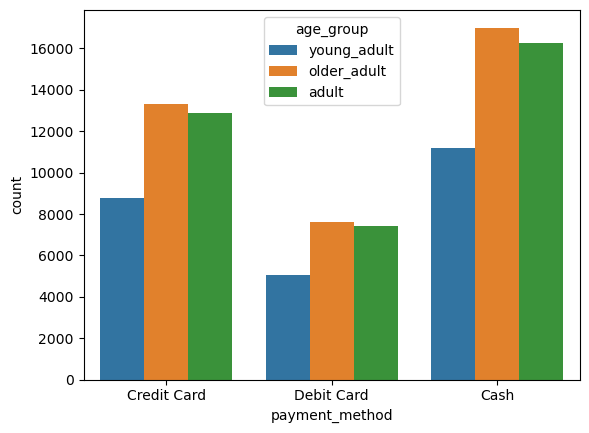

In [51]:
sns.countplot(x='payment_method', hue='age_group', data = filtro_mp)
plt.show()

##### Observo la cantidad personas de los diferentes grupos etarios

In [52]:
filtro_mp['age_group'].value_counts() 

older_adult    37925
adult          36537
young_adult    24995
Name: age_group, dtype: int64

 ## Métodos de pagos realizados por el rango etario de 25 a 35 años

In [53]:
rango = filtro_mp[(filtro_mp['age'] <= 35) & (filtro_mp['age'] >= 25)]
rango

,payment_method,age,gender,age_group
customer_id,,,,
C241288,Credit Card,28,Female,young_adult
C657758,Credit Card,28,Female,young_adult
C176086,Credit Card,32,Female,adult
C191708,Credit Card,29,Female,young_adult
C312861,Cash,25,Male,young_adult
...,...,...,...,...
C142643,Credit Card,28,Male,young_adult
C270290,Cash,35,Female,adult
C107209,Cash,32,Female,adult


##### Gráfico con elección de métodos de pagos por edades de el rango de 25 a 35 años.

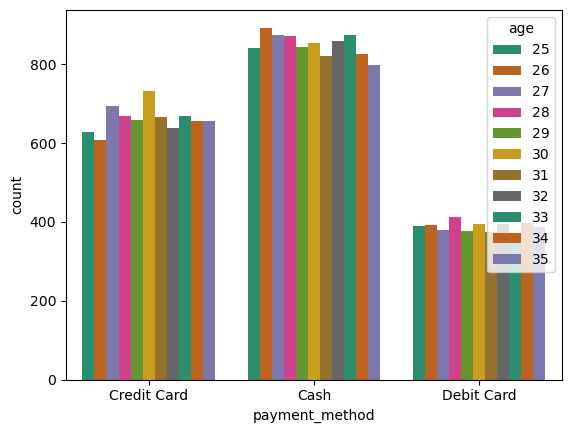

In [54]:
sns.countplot(x='payment_method', hue='age', data = rango, palette="Dark2")
plt.show()


###### Aquí observamos la cantidad de clientes y su elección por edades del rango de 25 a 35 años del método de pago 

In [55]:
pago_rango = rango.groupby(['payment_method'])['age'].value_counts()
pago_rango

payment_method  age
Cash            26     893
                33     875
                27     874
                28     871
                32     858
                30     853
                29     845
                25     842
                34     827
                31     821
                35     797
Credit Card     30     731
                27     694
                33     669
                28     668
                31     667
                29     658
                34     657
                35     656
                32     639
                25     627
                26     608
Debit Card      28     412
                34     397
                30     394
                32     394
                26     393
                25     390
                35     387
                27     380
                29     378
                31     374
                33     364
Name: age, dtype: int64

## Métodos de pago más utilizados por las mujeres.


##### Como se puede observar en el gráfico utilizado más arriba, que vuelvo a mostrar en esta parte del proyecto, el método más utilizado por mujeres y por hombres es el cash

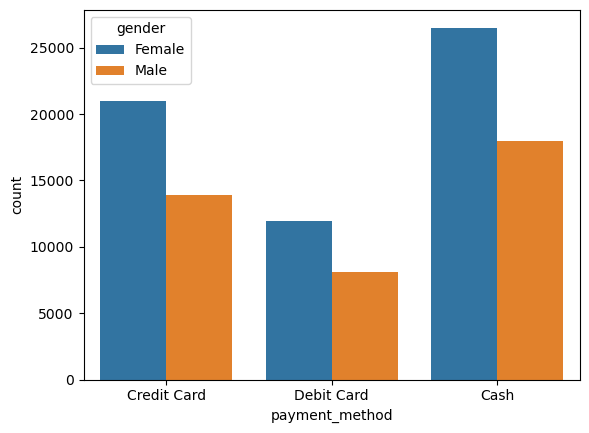

In [56]:
sns.countplot(x='payment_method', hue='gender', data = df_negocio)
plt.show()

## Precios por categoría de productos

In [57]:
precio_por_categoria = df_negocio.groupby(['category'])['price'].value_counts()
precio_por_categoria

category         price  
Books            75.75      1029
                 30.30      1008
                 45.45      1000
                 15.15       985
                 60.60       959
Clothing         600.16     6950
                 1500.40    6940
                 900.24     6907
                 1200.32    6849
                 300.08     6841
Cosmetics        121.98     3072
                 203.30     3055
                 162.64     3010
                 40.66      2986
                 81.32      2974
Food & Beverage  5.23       3002
                 15.69      2992
                 26.15      2989
                 10.46      2909
                 20.92      2884
Shoes            1200.34    2045
                 2400.68    2022
                 3000.85    2013
                 1800.51    2010
                 600.17     1944
Souvenir         35.19      1077
                 11.73      1024
                 58.65       992
                 23.46       984
                 4

##### Representeación de la suma total de los gastos a través de los precios por género

In [58]:
df_negocio.groupby('gender')['price'].sum() 

gender
Female    40931801.62
Male      27619564.29
Name: price, dtype: float64

##### Filtro los datos de las categorias correspondientes a los distintos centros comerciales.

In [59]:
centros = df_negocio.filter(["category", "shopping_mall"]).value_counts()
centros

category    shopping_mall    
Clothing    Mall of Istanbul     6923
            Kanyon               6840
            Metrocity            5268
            Metropol AVM         3525
            Istinye Park         3353
                                 ... 
Books       Viaport Outlet        246
Souvenir    Cevahir AVM           240
Books       Emaar Square Mall     236
Technology  Forum Istanbul        234
Souvenir    Viaport Outlet        225
Length: 80, dtype: int64

##### El gráfico nos muestra las preferencias de las categorias por parte de los centros comerciales

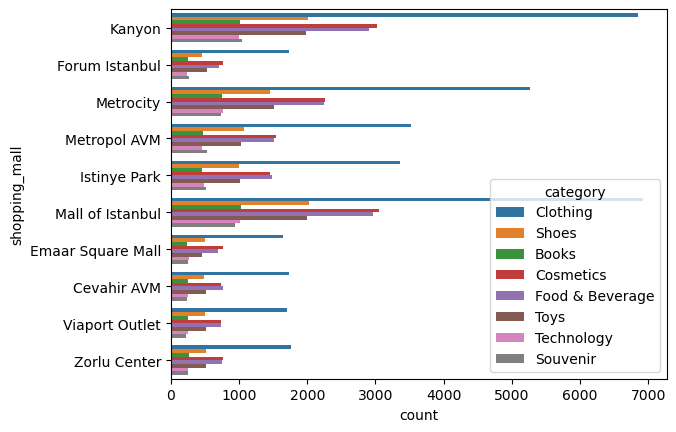

In [60]:
sns.countplot(y='shopping_mall', hue='category', data = df_negocio)
plt.show()

##### Filtro en base al centro comercial, categoría de producto y la cantidad 

In [61]:
df_negocio.filter(["category", "shopping_mall", "quantity"]).value_counts(dropna=False)

category    shopping_mall      quantity
Clothing    Mall of Istanbul   2           1426
                               5           1425
            Kanyon             1           1400
                               5           1380
            Mall of Istanbul   3           1375
                                           ... 
Books       Emaar Square Mall  2             39
Souvenir    Viaport Outlet     4             39
Technology  Forum Istanbul     5             39
Souvenir    Zorlu Center       5             38
Technology  Cevahir AVM        2             38
Length: 400, dtype: int64

In [62]:
df_negocio.max()

invoice_no                    I999994
category                         Toys
quantity                            5
price                          5250.0
invoice_date      2023-03-08 00:00:00
shopping_mall            Zorlu Center
gender                           Male
age                                69
payment_method             Debit Card
dtype: object

##### Centros comerciales que más veces aparecen, es decir más compras han hecho

In [63]:
df_negocio['shopping_mall'].value_counts(dropna=False)

Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64

##### Categorias más vendidas

In [64]:
df_negocio['category'].value_counts(dropna=False)

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

##### Calculo la media de la edad de los hombres y mujeres del dataFrame

In [65]:
df_negocio.groupby('gender')['age'].agg(['mean', 'std']) 

,mean,std
gender,,
Female,43.453364,14.955964
Male,43.383665,15.016869


##### Calculo la media y la desviación estandar entre categorias de producto y precio

In [66]:
df_negocio.groupby('category')['price'].agg(['mean', 'std']) 

,mean,std
category,,
Books,45.568621,21.492662
Clothing,901.084021,424.225594
Cosmetics,122.448626,57.458097
Food & Beverage,15.671948,7.422176
Shoes,1807.388568,845.116269
Souvenir,34.894345,16.564498
Technology,3156.935548,1481.559805
Toys,107.733185,50.364844


##### Calculo la media y desviacion estandar entre la categoría y cantidad de producto

In [67]:
df_negocio.groupby('category')['quantity'].agg(['mean', 'std']) 

,mean,std
category,,
Books,3.007830,1.418658
Clothing,3.002813,1.413708
Cosmetics,3.011525,1.413136
Food & Beverage,2.996548,1.419154
Shoes,3.011461,1.408128
Souvenir,2.974795,1.412148
Technology,3.006605,1.411009
Toys,3.005948,1.405269


##### Información por categoría de productos y cantidad pedidos

In [68]:
cantidad_por_categoria = df_negocio.groupby(['category'])['quantity'].value_counts()
cantidad_por_categoria

category         quantity
Books            5           1029
                 2           1008
                 3           1000
                 1            985
                 4            959
Clothing         2           6950
                 5           6940
                 3           6907
                 4           6849
                 1           6841
Cosmetics        3           3072
                 5           3055
                 4           3010
                 1           2986
                 2           2974
Food & Beverage  1           3002
                 3           2992
                 5           2989
                 2           2909
                 4           2884
Shoes            2           2045
                 4           2022
                 5           2013
                 3           2010
                 1           1944
Souvenir         3           1077
                 1           1024
                 5            992
                 2    

##### Se filtra cantidad de ventas por los años del DataFrame

In [69]:
df_negocio.invoice_date.dt.year.value_counts()

2022    45551
2021    45382
2023     8524
Name: invoice_date, dtype: int64

##### Se filtra las ventas por los meses del DataFrame

In [70]:
df_negocio.invoice_date.dt.month.value_counts()

1     11608
2     10482
3      8730
7      7877
10     7764
5      7697
12     7680
8      7635
6      7581
11     7563
4      7487
9      7353
Name: invoice_date, dtype: int64

##### El gráfico muestra las categorias elegidas por los diferentes géneros

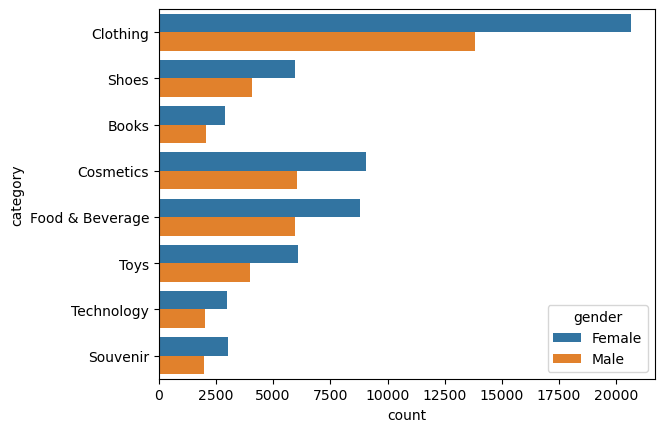

In [71]:
sns.countplot(y='category', hue='gender', data = df_negocio)
plt.show()

##### Distribución de las categorias por género

In [72]:
categoria_por_genero = df_negocio.groupby(['category'])['gender'].value_counts(dropna=False)
categoria_por_genero

category         gender
Books            Female     2906
                 Male       2075
Clothing         Female    20652
                 Male      13835
Cosmetics        Female     9070
                 Male       6027
Food & Beverage  Female     8804
                 Male       5972
Shoes            Female     5967
                 Male       4067
Souvenir         Female     3017
                 Male       1982
Technology       Female     2981
                 Male       2015
Toys             Female     6085
                 Male       4002
Name: gender, dtype: int64

##### Distribución de los shopping por género

In [73]:
shopping_por_genero = df_negocio.filter(["shopping_mall", "gender"]).value_counts(dropna=False)
shopping_por_genero

shopping_mall      gender
Kanyon             Female    11906
Mall of Istanbul   Female    11902
Metrocity          Female     8941
Mall of Istanbul   Male       8041
Kanyon             Male       7917
Metropol AVM       Female     6144
Metrocity          Male       6070
Istinye Park       Female     5874
Metropol AVM       Male       4017
Istinye Park       Male       3907
Forum Istanbul     Female     3016
Zorlu Center       Female     2968
Viaport Outlet     Female     2949
Cevahir AVM        Female     2940
Emaar Square Mall  Female     2842
Zorlu Center       Male       2107
Cevahir AVM        Male       2051
Emaar Square Mall  Male       1969
Viaport Outlet     Male       1965
Forum Istanbul     Male       1931
dtype: int64

##### Distribución de los shooping por género

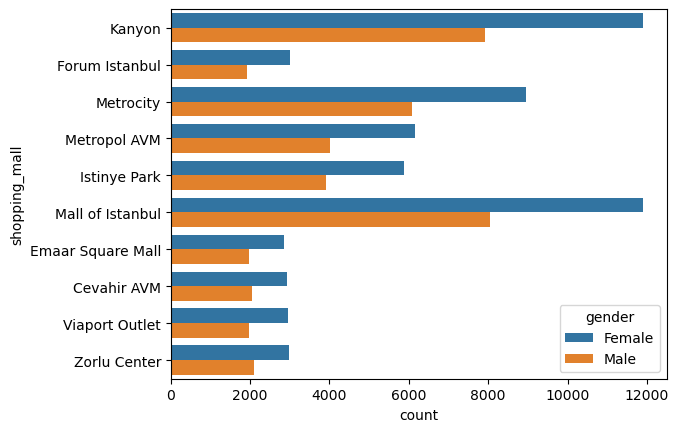

In [74]:
sns.countplot(y='shopping_mall', hue='gender', data = df_negocio)
plt.show()

##### Compruebo si se repite algún cliente a través del id

In [75]:
clientes = df_negocio.eq("custome_id").sum(1)
clientes

customer_id
C241288    0
C111565    0
C266599    0
C988172    0
C189076    0
          ..
C441542    0
C569580    0
C103292    0
C800631    0
C273973    0
Length: 99457, dtype: int64

In [76]:
clientes.sum()

0

## Limpieza de Datos (Load): Crear un nuevo Data Frame que contenga los datos limpios y transformados que serán utilizados para análisis posteriores.
### 6. Explicar cómo se carga este nuevo Data Frame y si se aplican restricciones de integridad en este paso

##### Como mencioné anteriormente, una vez realizada la limpieza y transformaciones necesarias, se guardo el archivo CSV del dataFrame al final del punto 3 del enunciado.
#### A continuación cargaré ese archivo limpio sin  aplicar restricciones ya que pandas no aplica restricciones automáticamente. Las restricciones de integridad son reglas que suelen aplicarse en las bases de datos relacionales.

In [88]:
df_negocio_limpio = pd.read_csv("negocio_resultado_final.csv", index_col = 'invoice_no')

In [89]:
df_negocio_limpio

,customer_id,category,quantity,price,invoice_date,shopping_mall,gender,age,payment_method
invoice_no,,,,,,,,,
I138884,C241288,Clothing,5,1500.40,2022-08-05,Kanyon,Female,28,Credit Card
I317333,C111565,Shoes,3,1800.51,2021-12-12,Forum Istanbul,Male,21,Debit Card
I127801,C266599,Clothing,1,300.08,2021-11-09,Metrocity,Male,20,Cash
I173702,C988172,Shoes,5,3000.85,2021-05-16,Metropol AVM,Female,66,Credit Card
I337046,C189076,Books,4,60.60,2021-10-24,Kanyon,Female,53,Cash
...,...,...,...,...,...,...,...,...,...
I219422,C441542,Souvenir,5,58.65,2022-09-21,Kanyon,Female,45,Credit Card
I325143,C569580,Food & Beverage,2,10.46,2021-09-22,Forum Istanbul,Male,27,Cash
I824010,C103292,Food & Beverage,2,10.46,2021-03-28,Metrocity,Male,63,Debit Card


##### Aquí guardo el dataFrame utilizado para la categorización de método de pago por género y edad

In [85]:
filtro_mp.to_csv("filtro_metodo_de_pago.csv")

In [86]:
filtro_mp

,payment_method,age,gender,age_group
customer_id,,,,
C241288,Credit Card,28,Female,young_adult
C111565,Debit Card,21,Male,young_adult
C266599,Cash,20,Male,young_adult
C988172,Credit Card,66,Female,older_adult
C189076,Cash,53,Female,older_adult
...,...,...,...,...
C441542,Credit Card,45,Female,adult
C569580,Cash,27,Male,young_adult
C103292,Debit Card,63,Male,older_adult
